In [134]:
import mip
import random
import networkx as nx
import matplotlib.pyplot as plt

In [156]:
def pl(var_type, G):
    m = mip.Model()
    y = {v: m.add_var(var_type=var_type) for v in G.nodes}
    for e in G.edges:
        Ve = [y[v] for v in G.nodes if v in e]
        m += mip.xsum(Ve) >= 1
    m.objective = mip.minimize(mip.xsum(y[v] for v in G.nodes))
    m.verbose = 0
    m.optimize(max_seconds=300)
    node_color = ['black']*len(G.nodes)
    for v in G.nodes:
        if y[v].x >= .5:
            node_color[v] = 'r'
    nx.draw_networkx(G, with_labels=False, node_color=node_color)
    plt.show()
    print(f"m.objective_value : {m.objective_value}")
    print(f"nombre de sommets dans la vertex cover : {node_color.count('r')}")

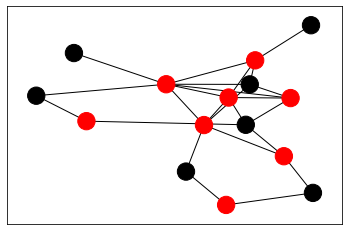

m.objective_value : 8.0
nombre de sommets dans la vertex cover : 8


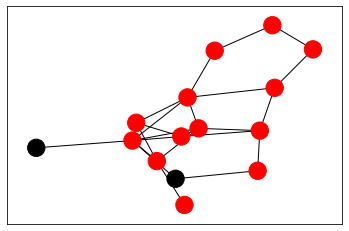

m.objective_value : 7.5
nombre de sommets dans la vertex cover : 13


In [157]:
G = nx.generators.random_graphs.erdos_renyi_graph(15, .2)
pl(mip.BINARY, G)
pl(mip.CONTINUOUS, G)

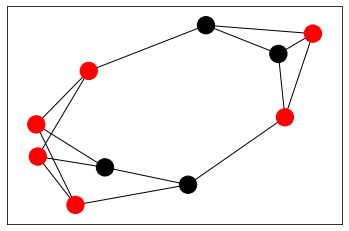

m.objective_value : 6.0
nombre de sommets dans la vertex cover : 6


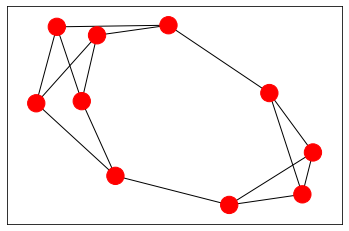

m.objective_value : 5.0
nombre de sommets dans la vertex cover : 10


In [158]:
G = nx.generators.random_graphs.random_regular_graph(3, 10)
pl(mip.BINARY, G)
pl(mip.CONTINUOUS, G)

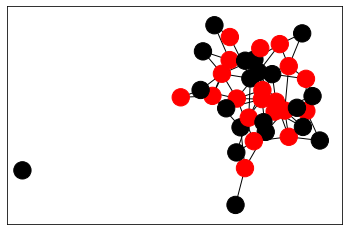

m.objective_value : 20.0
nombre de sommets dans la vertex cover : 20


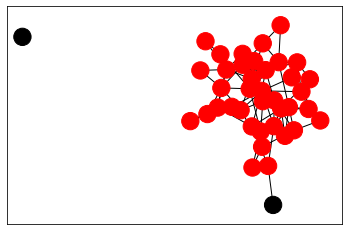

m.objective_value : 19.5
nombre de sommets dans la vertex cover : 38


In [159]:
G = nx.generators.random_graphs.gnm_random_graph(40, 80)
pl(mip.BINARY, G)
pl(mip.CONTINUOUS, G)